## Exercise 4-1 

Plot the approximation using n = 10 modes on top of the true triangle wave.

Code reference: [[databook_python]](https://github.com/dynamicslab/databook_python/blob/master/CH02/CH02_SEC01_1_FourierSines.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

Text(0, 0.5, 'f(x)')

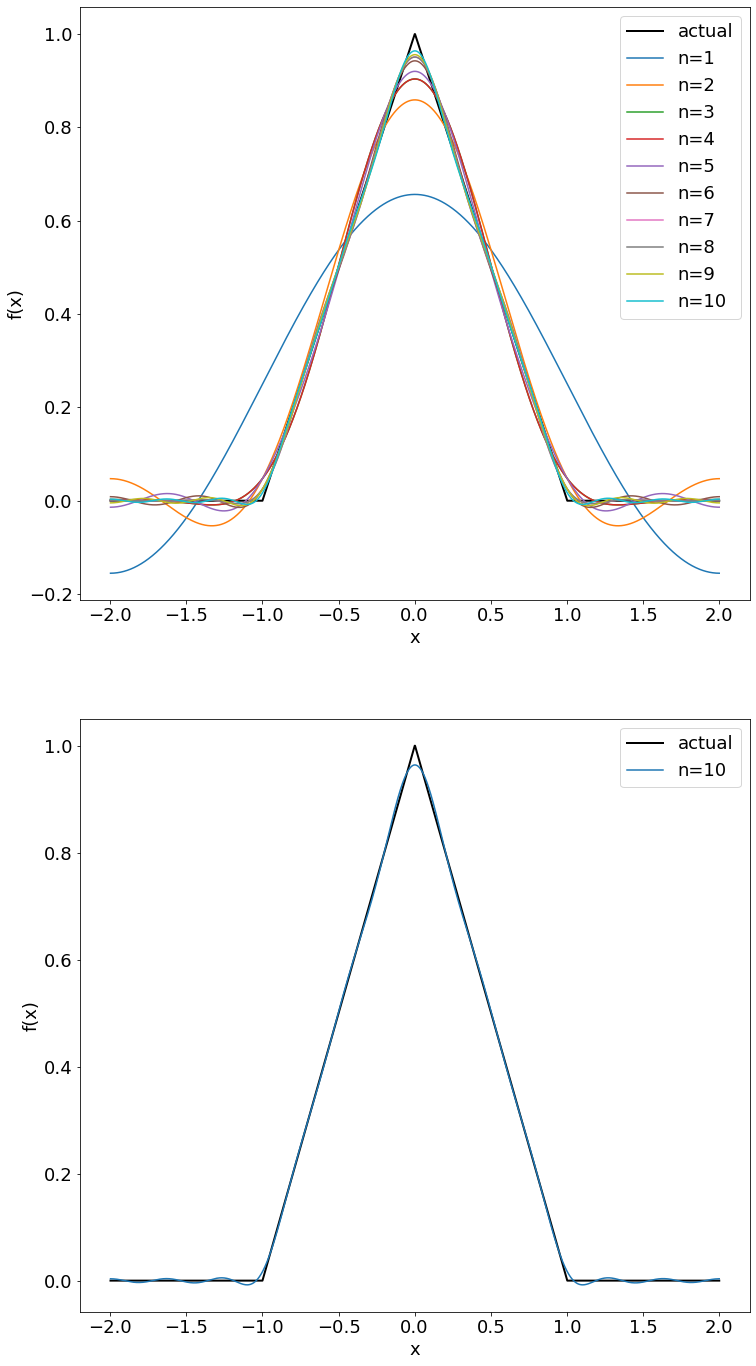

In [2]:
plt.rcParams['figure.figsize'] = [12, 24]
plt.rcParams.update({'font.size': 18})

# Define domain
dx = 0.001
L = 2.0
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fig, axs = plt.subplots(2,1)
axs[0].plot(x,f,'-',color='k',linewidth=2)
axs[1].plot(x,f,'-',color='k',linewidth=2)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
axs[0].set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(10)
B = np.zeros(10)
for k in range(10):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    axs[0].plot(x,fFS,'-')
axs[1].plot(x,fFS,'-')

# settings for the plots
axs[0].legend(['actual','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=10'])
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[1].legend(['actual','n=10'])
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')

Also, plot the mode coefficients an and bn for the first 100 cosine and sine modes

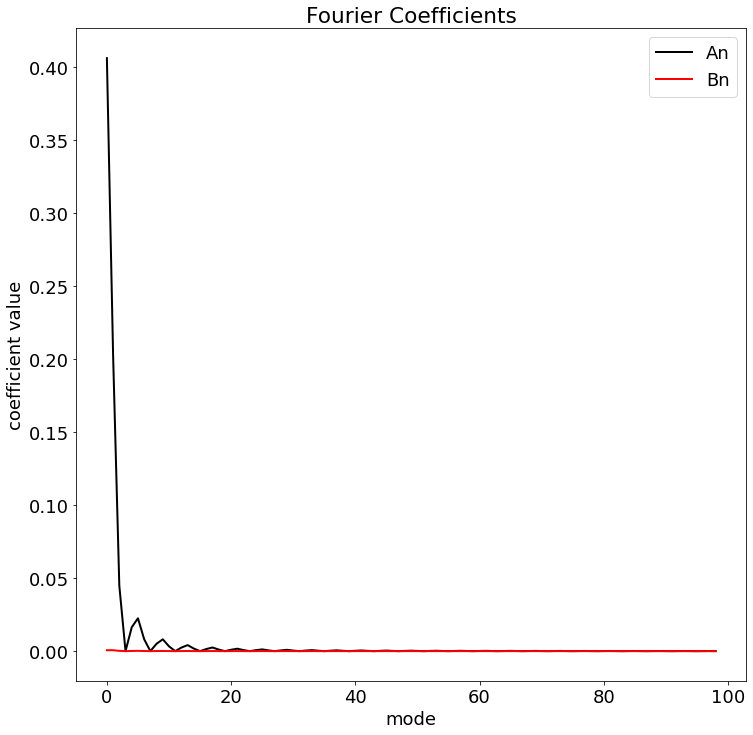

In [3]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

fFS = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)

A[0] = A0/2

for k in range(1,kmax):
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)

# n=1~100
fig, ax = plt.subplots()
ax.plot(np.arange(kmax-1),A[1:],color='k',linewidth=2)
ax.plot(np.arange(kmax-1),B[1:],color='r',linewidth=2)
plt.title('Fourier Coefficients')
plt.legend(['An','Bn'])
plt.ylabel('coefficient value')
plt.xlabel('mode')
plt.show()